<a href="https://colab.research.google.com/github/iamrishav/IR2022_Project_28/blob/main/IR_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U spacy


In [ ]:
# !python3 -m spacy download en_core_web_trf

In [ ]:
import spacy


In [ ]:
# pip install -U spacy[transformers]

In [ ]:
import pandas as pd
import numpy as np
import zipfile,nltk
from nltk.corpus import PlaintextCorpusReader 
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from nltk.corpus import stopwords
import heapq as hq
import sys
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import csv
import os
import string
import re
from bs4 import BeautifulSoup
from ast import literal_eval
nltk.download('stopwords')
from collections import Counter
import math

STOPWORDS

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
# stopwords

In [ ]:
stopwords.add("places")
stopwords.add("place")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


READING DATA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/Project_data_mid_final.csv')

In [ ]:
df

,Place,City,Raw_Review,Rating,new_lat_long
0,3Cs Mall,New Delhi,"['better', 'ordered', 'gut', 'pre', 'strong', ...",4.000000,"[28.5658122,77.2468466]"
1,Aai Museum,Mumbai,"['lovers', 'two', 'brave', 'nice', 'pilaji', '...",5.000000,"[19.0964017, 72.86293309999999]"
2,Aarey Bhaskar Garden,Mumbai,"['making', 'actually', 'east', 'lively', 'main...",5.000000,"[19.1714434,72.8725018]"
3,Aarey Colony,Mumbai,"['soothing', 'mumbai', 'left', 'others', 'calm...",3.545455,"[19.1503904, 72.87426783008218]"
4,Adventure Island,New Delhi,"['clean', 'budget', 'foul', 'comments', 'aerop...",4.507246,"[28.7251351,77.113468]"
...,...,...,...,...,...
338,Worli Fort,Mumbai,"['clearly', 'arabian', 'terrace', 'link', 'bay...",5.000000,"[19.02374855, 72.81683615091026]"
339,Worli Sea Face,Mumbai,"['clean', 'mumbai', 'aroma', 'residence', 'bel...",4.418182,"[19.005448, 72.8137566]"
340,Yamuna Sports Complex,New Delhi,"['clean', 'management', 'possible', 'feel', 'c...",3.750000,"[28.6635553, 77.3116132]"
341,Yogmaya Temple,New Delhi,"['killed', 'prison', 'krishna', 'fell', 'girl'...",2.000000,"[28.5252513, 77.1827064]"


CREATING NEW COLUMNS OF LATITUDE AND LONGITUDE


In [ ]:
df['Raw_Review']= df['Raw_Review'].apply(literal_eval)
df['new_lat_long']=df['new_lat_long'].apply(literal_eval)
lat=[]
longi=[]
for i in range(df.shape[0]):
  a=df.iloc[i]['new_lat_long']
  lat.append(a[0])
  longi.append(a[1])

df['Latitude']=lat
df['Longitude']=longi

CREATING VOCAB 

In [ ]:
vocab = []
for i, j in df.iterrows():
  tokens = set(df['Raw_Review'][i])
  for token in tokens:
    if token not in vocab:
      vocab.append(token)

VOCAB LENGTH 

In [ ]:
len(vocab)

19729

VOCAB SAVE

In [ ]:
np.save("/content/drive/MyDrive/IR_Project_Shared/vocab1", vocab)

In [ ]:
vc=np.save("/content/drive/MyDrive/IR_Project_Shared/vocab1", vocab)

In [ ]:
nlp= spacy.load("en_core_web_trf")
nlp.pipe_names

['transformer', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Query processing +JC

In [ ]:
def make_query(query,city):
  query_x = query.replace("\n", " ") #replace newlines with spaces
  query_x = query_x.replace("\t", " ") #replace tab indents with spaces
  query_x = re.sub(r"http\S+", "", str(query_x)) #remove URLs
  query_x = BeautifulSoup(query_x, "lxml").get_text() #remove tags
  query_x = re.sub("\S*\d\S*", "", str(query_x)).strip() #remove words with numbers
  query_x = re.sub(r"n\'t", " not", str(query_x)) #replace n't with not
  query_x = re.sub(r"\'re", " are", str(query_x)) #replace 're with are
  query_x = re.sub(r"\'s", " is", str(query_x)) #replace 's' with is
  query_x = re.sub(r"\'ll", " will", str(query_x)) #replace 'll with will
  query_x = re.sub(r"\'d", " would", str(query_x)) #replace 'd' with would
  query_x = re.sub(r"\'ve", " have", str(query_x)) #replace 've with have
  query_x = re.sub(r"\'m", " am", str(query_x)) #replace 'm with am
  query_x = re.sub("[^A-Za-z0-9]+", " ", str(query_x)) #replace punctuations and special characters with spaces

  #remove stopwords and convert words to lowercase
  query_x = ' '.join(worD.lower() for worD in query_x.split() if worD.lower() not in stopwords)

  #tokenize preprocessed query
  tokenized_query = word_tokenize(query_x)

  #return if there's only one token or no tokens at all
  if len(tokenized_query) <= 0:
      print("No tokens are alive after preprocessing!")

  #print preprocessed query

  tokenized_query = set(tokenized_query)
  import spacy

# Load English tokenizer, tagger, parser and NER 
#POS tagging to remove verbs from query for better filteration
  nlp = spacy.load("en_core_web_trf")

  text = (query)
  doc = nlp(text)
  final_tokenized_query=[]
  verb= [token.text for token in doc if token.pos_ == "VERB"]
  for i in tokenized_query:
    if i not in verb:
      final_tokenized_query.append(i)
  # print(len(final_tokenized_query))
 

  #Implementing Jaccard Coefficient
  jc=[]
  df1=df[df['City']==city]
  for i, j in df1.iterrows():
    pair = []
    mjc = len(set(j['Raw_Review']) & set(final_tokenized_query)) / len(set(j['Raw_Review']) | set(final_tokenized_query))
    if mjc != 0:
      pair.append(mjc)
      pair.append(i)
      jc.append(pair)
  sorter = lambda x: (x[0], x[1])
  sorted_jc = sorted(jc, key=sorter, reverse=True)
  ans_places=[]
    #Returning places 
  # print(len(sorted_jc))
  if(len(sorted_jc)>=3):
    for i in range(min(25,len(sorted_jc))):
      ans_places.append([df1['Place'][sorted_jc[i][1]], df1['City'][sorted_jc[i][1]]])
  return ans_places, final_tokenized_query

Input query

In [ ]:
query=" I want to visit parks or park"
city="New Delhi"
ans_places,final_tokenised_q=make_query(query,city)
print(ans_places)
print(final_tokenised_q)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


[["National Children's Museum", 'New Delhi'], ['Tomb of Balban', 'New Delhi'], ['Delhi University Sports Complex', 'New Delhi'], ['Swarn Jayanti Park', 'New Delhi'], ['Delhi Rides', 'New Delhi'], ['Mutiny Memorial', 'New Delhi'], ['Millennium Park', 'New Delhi'], ['Ajmeri Gate', 'New Delhi'], ['Major Dhyan Chand National Stadium', 'New Delhi'], ['Waste to Wonder Park', 'New Delhi'], ['Waste to Wonders', 'New Delhi'], ["Fun 'n' Food Village", 'New Delhi'], ['Rajon Ki Baoli', 'New Delhi'], ['Talkatora Garden', 'New Delhi'], ['Chittaranjan Park Kali Mandir', 'New Delhi'], ['Pragati Maidan', 'New Delhi'], ['Hauz Khas District Park', 'New Delhi'], ['Buddha Jayanti Park', 'New Delhi'], ['Nehru Park', 'New Delhi'], ['Deer Park', 'New Delhi'], ['Metro Walk Mall', 'New Delhi'], ['Adventure Island', 'New Delhi'], ['Sunder Nursery', 'New Delhi'], ['National Zoological Park of Delhi', 'New Delhi'], ["Children's Park", 'New Delhi']]
['parks', 'park']


Implementing K means for different no of days

In [ ]:
type(ans_places)

list

In [ ]:
df_val=df['new_lat_long']
df_val

0              [28.5658122, 77.2468466]
1       [19.0964017, 72.86293309999999]
2              [19.1714434, 72.8725018]
3       [19.1503904, 72.87426783008218]
4               [28.7251351, 77.113468]
                     ...               
338    [19.02374855, 72.81683615091026]
339             [19.005448, 72.8137566]
340            [28.6635553, 77.3116132]
341            [28.5252513, 77.1827064]
342            [28.5190499, 77.1797279]
Name: new_lat_long, Length: 343, dtype: object

Filtered places based on user query

In [ ]:
ans_placesc = [x[0] for x in ans_places]
ans_df=df[df['Place'].isin(ans_placesc)]
# ans_df
ans_df=ans_df[ans_df['City']==city]
ans_df.shape

(25, 7)

KMeans

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
obj=KMeans()
if(len(ans_places)<4):
 n_c=len(ans_places)
else:
  n_c=4
kmeans = KMeans(random_state=0,n_clusters=n_c).fit(ans_df[['Latitude','Longitude']])
kmeans.labels_

array([0, 2, 2, 3, 1, 3, 1, 2, 3, 3, 2, 0, 1, 2, 2, 1, 3, 2, 3, 1, 3, 2,
       3, 1, 1], dtype=int32)

Scatter plot

Text(0, 0.5, 'Component 2')

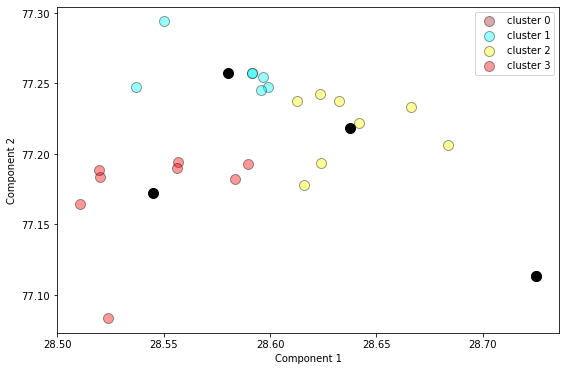

In [ ]:
import matplotlib.pyplot as plt
colour=['brown','cyan','yellow','red']
# print(x_tsne.shape)

cluster_no=[0,1,2,3]
label=['cluster 0','cluster 1','cluster 2','cluster 3']

for i in range(4):
  list_c=np.where(kmeans.labels_==i)
  X_tr=ans_df.iloc[list_c]
  
  plt.figure(1, figsize=(9,6),)
  plt.scatter(X_tr['Latitude'], X_tr['Longitude'],c=colour[i],label=label[i],s=100, edgecolors='black',alpha=0.4)
  plt.legend()

  plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],c='black',s=100)
plt.xlabel("Component 1")
plt.ylabel("Component 2")

DISTANCE BETWEEN CLUSTER CENTERS

In [ ]:
!pip install python-tsp
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from scipy.spatial.distance import cdist
arr=pd.DataFrame(kmeans.cluster_centers_)
arr.shape

distance_matrix = cdist(
    arr.values, 
    arr.values,
)
distance_matrix

permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
###permutation 
print(permutation)
print(distance)

[0, 2, 1, 3]
0.4878817805833582


HESEVIR DISTANCE 

In [ ]:
# donot consider it
# import geopy.distance
# distance_matrix =np.zeros((4,4))
# for i in range(len(arr)):
#   for j in range(len(arr)):

#     distance_matrix[i][j] = geopy.distance.geodesic(arr.iloc[i], arr.iloc[j]).km
# # print geopy.distance.geodesic(coords_1, coords_2).km

In [ ]:
# distance_matrix


Printing Day-Wise Plan

In [ ]:
counter=1
for i in permutation:
  list_c=np.where(kmeans.labels_==i)
  # print(list_c)
  X_tr=ans_df.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Adventure Island' 'Metro Walk Mall']
Travel locations for day 2
['Ajmeri Gate' 'Buddha Jayanti Park' 'Delhi University Sports Complex'
 'Major Dhyan Chand National Stadium' 'Mutiny Memorial'
 "National Children's Museum" 'Pragati Maidan' 'Talkatora Garden']
Travel locations for day 3
['Chittaranjan Park Kali Mandir' 'Delhi Rides' 'Millennium Park'
 'National Zoological Park of Delhi' 'Sunder Nursery'
 'Waste to Wonder Park' 'Waste to Wonders']
Travel locations for day 4
["Children's Park" 'Deer Park' "Fun 'n' Food Village"
 'Hauz Khas District Park' 'Nehru Park' 'Rajon Ki Baoli'
 'Swarn Jayanti Park' 'Tomb of Balban']


TF-IDF

In [ ]:
index = {}
for i, j in df.iterrows():
  tokens = df['Raw_Review'][i]
  for token in tokens:
    if token not in index:
      index[token]={'doc_freq':0}

In [ ]:
for i, j in df.iterrows():
  tokens = set(df['Raw_Review'][i])
  for token in tokens:
    index[token]['doc_freq']+=1

In [ ]:
total_documents = df.shape[0]

TFIDF FOR DIFFERENT SCHEMES FOR 5 DIFFERENT SCHEMES

In [ ]:
def TFIDF_MATRIX(corpus, weighting):
  tf_idf_matrix = []
  for tokens in corpus:
    matrix = []
    counts = Counter(tokens)
    for token in vocab:
      if weighting ==1:
        if counts[token]>0:
          TF=1
        else:
          TF=0
      elif weighting==2:
        # if counts[token]>0:
        TF = counts[token]
        # else:
        #   TF=0
      elif weighting==3:
        TF = counts[token]/len(tokens)
      elif weighting==4:
        TF = math.log(counts[token]+1)
      else:
        max = counts.most_common(1)[0][1]
        TF = 0.5 + (0.5 * (counts[token]/max))
      IDF = np.log(total_documents/(index[token]['doc_freq']+1))
      matrix.append(TF*IDF)
    tf_idf_matrix.append(matrix)
  return tf_idf_matrix

In [ ]:
tfidf_matrix1 = TFIDF_MATRIX(df['Raw_Review'],1)
tfidf_matrix2 = TFIDF_MATRIX(df['Raw_Review'],2)
tfidf_matrix3 = TFIDF_MATRIX(df['Raw_Review'],3)
tfidf_matrix4 = TFIDF_MATRIX(df['Raw_Review'],4)
tfidf_matrix5 = TFIDF_MATRIX(df['Raw_Review'],5)

In [ ]:
# np.save("/content/drive/MyDrive/IR_Project_Shared/Model/tfidf_matrix1", tfidf_matrix1)
# np.save("/content/drive/MyDrive/IR_Project_Shared/Model/tfidf_matrix2", tfidf_matrix2)
# np.save("/content/drive/MyDrive/IR_Project_Shared/Model/tfidf_matrix3", tfidf_matrix3)
# np.save("/content/drive/MyDrive/IR_Project_Shared/Model/tfidf_matrix4", tfidf_matrix4)
# np.save("/content/drive/MyDrive/IR_Project_Shared/Model/tfidf_matrix5", tfidf_matrix5)

In [ ]:
# np.save("tfidf_matrix", tfidf_matrix)

In [ ]:
# tfidf_matrix = np.load('tfidf_matrix.npy')

cosine SIMILARITY FOR CALCULATING SCORE

In [ ]:
def similarity(d2,tfidf_matrix):
  res =[]
  for i in range(len(tfidf_matrix)):
    dot = np.dot(d2,tfidf_matrix[i])
    b = np.power(tfidf_matrix[i],2)
    c= np.power(d2,2)
    moda = np.sqrt(np.sum(b))
    modb =np.sqrt(np.sum(c))
    result = dot/(moda*modb)
    res.append([i,result])
  return res

QUERY PROCESSING

In [ ]:
def make_querytfidf(query,city):
  query_x = query.replace("\n", " ") #replace newlines with spaces
  query_x = query_x.replace("\t", " ") #replace tab indents with spaces
  query_x = re.sub(r"http\S+", "", str(query_x)) #remove URLs
#   query_x = BeautifulSoup(query_x, "lxml").get_text() #remove tags
  query_x = re.sub("\S*\d\S*", "", str(query_x)).strip() #remove words with numbers
  query_x = re.sub(r"n\'t", " not", str(query_x)) #replace n't with not
  query_x = re.sub(r"\'re", " are", str(query_x)) #replace 're with are
  query_x = re.sub(r"\'s", " is", str(query_x)) #replace 's' with is
  query_x = re.sub(r"\'ll", " will", str(query_x)) #replace 'll with will
  query_x = re.sub(r"\'d", " would", str(query_x)) #repl ace 'd' with would
  query_x = re.sub(r"\'ve", " have", str(query_x)) #replace 've with have
  query_x = re.sub(r"\'m", " am", str(query_x)) #replace 'm with am
  query_x = re.sub("[^A-Za-z0-9]+", " ", str(query_x)) #replace punctuations and special characters with spaces

  #remove stopwords and convert words to lowercase
  
  query_x = ' '.join(worD.lower() for worD in query_x.split() if worD.lower() not in stopwords)

  #tokenize preprocessed query
  tokenized_query = word_tokenize(query_x)
  

  ### Removing verbs from query for better filtering
  import spacy
  nlp = spacy.load("en_core_web_trf")
  text = (query)
  doc = nlp(text)
  final_tokenized_query=[]
  verb= [token.text for token in doc if token.pos_ == "VERB"]
  for i in tokenized_query:
    if i not in verb:
      final_tokenized_query.append(i)


  matrix1 = TFIDF_MATRIX([final_tokenized_query],1)
  matrix2 = TFIDF_MATRIX([final_tokenized_query],2)
  matrix3 = TFIDF_MATRIX([final_tokenized_query],3)
  matrix4 = TFIDF_MATRIX([final_tokenized_query],4)
  matrix5 = TFIDF_MATRIX([final_tokenized_query],5)

  result1 = sorted(similarity(matrix1, tfidf_matrix1),key=lambda x: x[1],reverse=True)
  result2 = sorted(similarity(matrix2, tfidf_matrix2),key=lambda x: x[1], reverse=True)
  result3 = sorted(similarity(matrix3, tfidf_matrix3),key=lambda x: x[1], reverse=True)
  result4 = sorted(similarity(matrix4, tfidf_matrix4),key=lambda x: x[1], reverse=True)
  result5 = sorted(similarity(matrix5, tfidf_matrix5),key=lambda x: x[1], reverse=True)
   
  #Weighing Scheme 1
  ans_tfidf1=[]
  for j in range(25):
    if df.iloc[result1[j][0]]['City']==city:
      ans_tfidf1.append([df.iloc[result1[j][0]]['Place'], df.iloc[result1[j][0]]['City']])


  # Weighting Scheme 2
  ans_tfidf2=[]
  for j in range(25):
    if df.iloc[result2[j][0]]['City']==city:
      ans_tfidf2.append([df.iloc[result2[j][0]]['Place'], df.iloc[result2[j][0]]['City']])

  # Weighting Scheme 3
  ans_tfidf3=[]
  for j in range(25):
    if df.iloc[result3[j][0]]['City']==city:
      ans_tfidf3.append([df.iloc[result3[j][0]]['Place'], df.iloc[result3[j][0]]['City']])

  # Weighting Scheme 4
  ans_tfidf4=[]
  for j in range(25):
    if df.iloc[result4[j][0]]['City']==city:
      ans_tfidf4.append([df.iloc[result4[j][0]]['Place'], df.iloc[result4[j][0]]['City']])

  # Weighting Scheme 5
  ans_tfidf5=[]
  for j in range(25):
    if df.iloc[result5[j][0]]['City']==city:
      ans_tfidf5.append([df.iloc[result5[j][0]]['Place'], df.iloc[result5[j][0]]['City']])

  return ans_tfidf1,ans_tfidf2,ans_tfidf3,ans_tfidf4,ans_tfidf5

In [ ]:
city="Mumbai"
ans_tfidf1,ans_tfidf2,ans_tfidf3,ans_tfidf4,ans_tfidf5=make_querytfidf("I am planning to go on holiday to mumbai for a week, i am looking for visiting historical places and malls",city)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


RESULTS OF DIFFERENT SCHEMES OF TF-IDF

In [ ]:
print("Weighing Scheme1",ans_tfidf1)
print("Weighing Scheme2",ans_tfidf2)
print("Weighing Scheme3",ans_tfidf3)
print("Weighing Scheme4",ans_tfidf4)
print("Weighing Scheme5",ans_tfidf5)

Weighing Scheme1 [['Prime Mall', 'Mumbai'], ['Link Square Mall', 'Mumbai'], ['R Odeon Mall', 'Mumbai'], ['Dynamix Mall', 'Mumbai'], ['Juhu', 'Mumbai'], ['Nirmal Lifestyle Mall', 'Mumbai'], ['Chor Bazaar', 'Mumbai'], ['Inorbit Mall', 'Mumbai'], ['Madh Island', 'Mumbai'], ['K Star Mall', 'Mumbai'], ['Atria Mall', 'Mumbai'], ['Ballard Estate', 'Mumbai'], ['Gorai Beach', 'Mumbai'], ['Malabar Hill', 'Mumbai'], ['High Street Phoenix', 'Mumbai']]
Weighing Scheme2 [['Prime Mall', 'Mumbai'], ['Link Square Mall', 'Mumbai'], ['R Odeon Mall', 'Mumbai'], ['Dynamix Mall', 'Mumbai'], ['Juhu', 'Mumbai'], ['Nirmal Lifestyle Mall', 'Mumbai'], ['Chor Bazaar', 'Mumbai'], ['Inorbit Mall', 'Mumbai'], ['Madh Island', 'Mumbai'], ['K Star Mall', 'Mumbai'], ['Atria Mall', 'Mumbai'], ['Ballard Estate', 'Mumbai'], ['Gorai Beach', 'Mumbai'], ['Malabar Hill', 'Mumbai'], ['High Street Phoenix', 'Mumbai']]
Weighing Scheme3 [['Prime Mall', 'Mumbai'], ['Link Square Mall', 'Mumbai'], ['R Odeon Mall', 'Mumbai'], ['Dynami

In [ ]:
 len(ans_tfidf1)

15

FILTERING OF ROWS FROM MAIN DATAFRAME

In [ ]:
def rowfilter(ans_tf):
  ans_tf_idf = [x[0] for x in ans_tf]
  ans_df=df[df['Place'].isin(ans_tf_idf)]
  # ans_df
  ans_df=ans_df[ans_df['City']==city]
  return ans_df

In [ ]:
ans_df1=rowfilter(ans_tfidf1)
ans_df2=rowfilter(ans_tfidf2)
ans_df3=rowfilter(ans_tfidf3)
ans_df4=rowfilter(ans_tfidf4)
ans_df5=rowfilter(ans_tfidf5)

In [ ]:
print(ans_df1.shape)
print(ans_df2.shape)
print(ans_df3.shape)
print(ans_df4.shape)
print(ans_df5.shape)

(15, 7)
(15, 7)
(15, 7)
(15, 7)
(12, 7)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

DISTANCE BETWEEN CLUSTER CENTERS

In [ ]:
!pip install python-tsp
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from scipy.spatial.distance import cdist
def tfidf_dist(ob):
  arr=pd.DataFrame(ob.cluster_centers_)
  arr.shape

  distance_matrix = cdist(
      arr.values, 
      arr.values,
  )
  distance_matrix

  permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
  return permutation,distance

KMEANS ON DIFFERENT SCHEMES AND THEIR PLOT

In [ ]:
import matplotlib.pyplot as plt
colour=['brown','cyan','yellow','red']
# print(x_tsne.shape)

cluster_no=[0,1,2,3]
label=['cluster 0','cluster 1','cluster 2','cluster 3']
arr_perm_tfidf=[]
arr_dist_tfidf=[]
kmeans_obj=[]
def kmeans_plot(ans_final_df,j):
  # plt.figure(1, figsize=(20,20),)
  obj=KMeans()
  kmeans = KMeans(random_state=0,n_clusters=4).fit(ans_final_df[['Latitude','Longitude']])
  kmeans.labels_
  kmeans_obj.append(kmeans.labels_)
  per,dist=tfidf_dist(kmeans)
  arr_perm_tfidf.append(per)
  arr_dist_tfidf.append(dist)
  for i in range(4):

    list_c=np.where(kmeans.labels_==i)
   
    X_tr=ans_final_df.iloc[list_c]
    plt.figure(1, figsize=(30,10),)
    plt.subplot(2,3,j)
   
    plt.scatter(X_tr['Latitude'], X_tr['Longitude'],c=colour[i],label=label[i],s=100, edgecolors='black',alpha=0.4)
    plt.legend()

    plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],c='black',s=100)
  plt.xlabel("Component 1")
  plt.ylabel("Component 2")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

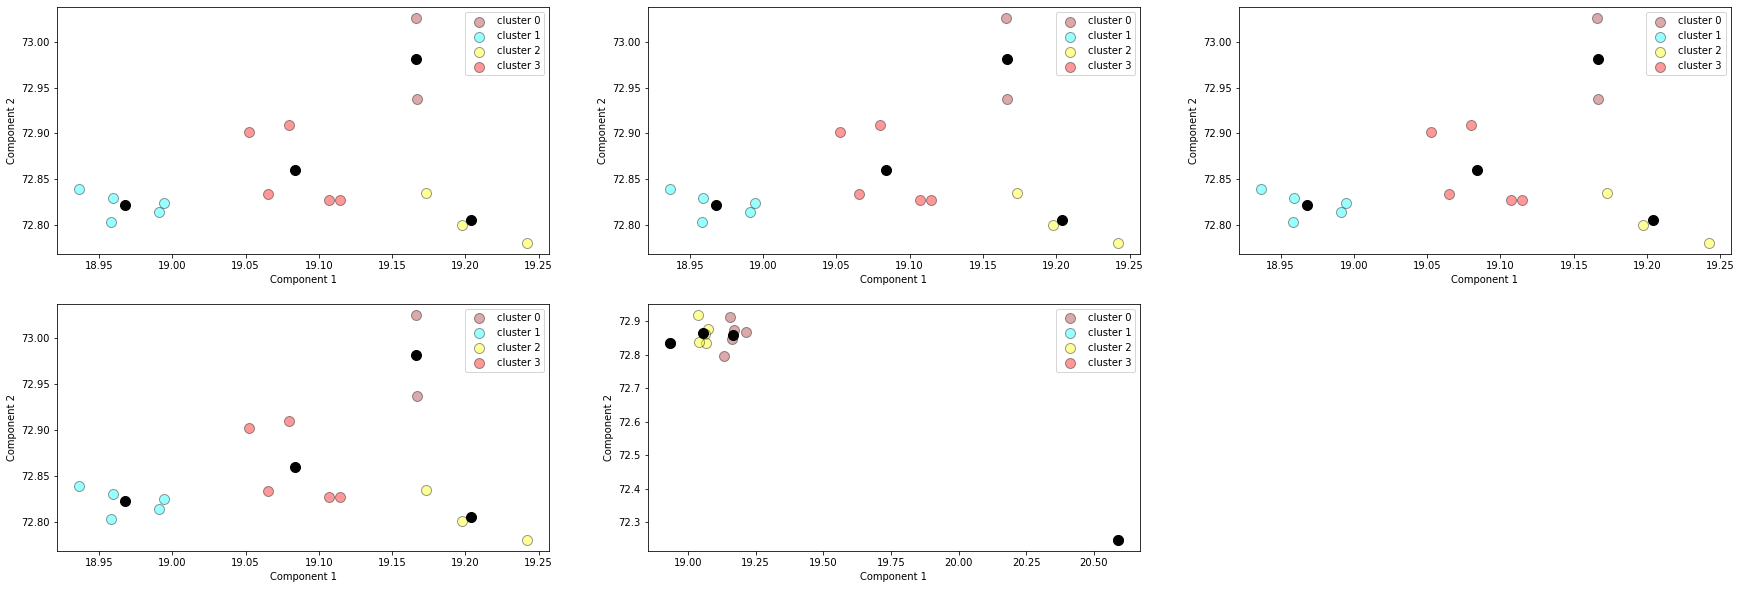

In [ ]:
kmeans_plot(ans_df1,1)
kmeans_plot(ans_df2,2)
kmeans_plot(ans_df3,3)
kmeans_plot(ans_df4,4)
kmeans_plot(ans_df5,5)

CLUSTER VISTING ORDER BASED ON PERMUTATION OBTAINED

In [ ]:
for i in range(5):
  print("Visting order of clusters for",i+1,"is",arr_perm_tfidf[i])
  print("Total distance travelled is",arr_dist_tfidf[i])
 


Visting order of clusters for 1 is [0, 2, 1, 3]
Total distance travelled is 0.6851193959499056
Visting order of clusters for 2 is [0, 2, 1, 3]
Total distance travelled is 0.6851193959499056
Visting order of clusters for 3 is [0, 2, 1, 3]
Total distance travelled is 0.6851193959499056
Visting order of clusters for 4 is [0, 2, 1, 3]
Total distance travelled is 0.6851193959499056
Visting order of clusters for 5 is [0, 1, 3, 2]
Total distance travelled is 3.538172645976215


VISITING ORDER OF PLACES FOR WEIGHING SCHEME 1

In [ ]:
counter=1
for i in arr_perm_tfidf[0]:
  list_c=np.where(kmeans_obj[0]==i)
  # print(list_c)
  X_tr=ans_df1.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Nirmal Lifestyle Mall' 'Prime Mall']
Travel locations for day 2
['Gorai Beach' 'Inorbit Mall' 'Madh Island']
Travel locations for day 3
['Atria Mall' 'Ballard Estate' 'Chor Bazaar' 'High Street Phoenix'
 'Malabar Hill']
Travel locations for day 4
['Dynamix Mall' 'Juhu' 'K Star Mall' 'Link Square Mall' 'R Odeon Mall']


VISTING ORDER FOR WEIGHING SCHEME 2

In [ ]:
counter=1
for i in arr_perm_tfidf[1]:
  list_c=np.where(kmeans_obj[1]==i)
  # print(list_c)
  X_tr=ans_df2.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Nirmal Lifestyle Mall' 'Prime Mall']
Travel locations for day 2
['Gorai Beach' 'Inorbit Mall' 'Madh Island']
Travel locations for day 3
['Atria Mall' 'Ballard Estate' 'Chor Bazaar' 'High Street Phoenix'
 'Malabar Hill']
Travel locations for day 4
['Dynamix Mall' 'Juhu' 'K Star Mall' 'Link Square Mall' 'R Odeon Mall']


VISITING ORDER FOR WEIGHING SCHEME 3

In [ ]:
counter=1
for i in arr_perm_tfidf[2]:
  list_c=np.where(kmeans_obj[2]==i)
  # print(list_c)
  X_tr=ans_df3.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Nirmal Lifestyle Mall' 'Prime Mall']
Travel locations for day 2
['Gorai Beach' 'Inorbit Mall' 'Madh Island']
Travel locations for day 3
['Atria Mall' 'Ballard Estate' 'Chor Bazaar' 'High Street Phoenix'
 'Malabar Hill']
Travel locations for day 4
['Dynamix Mall' 'Juhu' 'K Star Mall' 'Link Square Mall' 'R Odeon Mall']


VISITING ORDER FOR WEIGHING SCHEME 4

In [ ]:
counter=1
for i in arr_perm_tfidf[3]:
  list_c=np.where(kmeans_obj[3]==i)
  # print(list_c)
  X_tr=ans_df4.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Nirmal Lifestyle Mall' 'Prime Mall']
Travel locations for day 2
['Gorai Beach' 'Inorbit Mall' 'Madh Island']
Travel locations for day 3
['Atria Mall' 'Ballard Estate' 'Chor Bazaar' 'High Street Phoenix'
 'Malabar Hill']
Travel locations for day 4
['Dynamix Mall' 'Juhu' 'K Star Mall' 'Link Square Mall' 'R Odeon Mall']


VISITING ORDER FOR WEIGHING SCHEME 5

In [ ]:
counter=1
for i in arr_perm_tfidf[4]:
  list_c=np.where(kmeans_obj[4]==i)
  # print(list_c)
  X_tr=ans_df5.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['Place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Aarey Bhaskar Garden' 'Madh Fort' 'Orchid City Centre Mall' 'V Mall'
 'Vihar Lake']
Travel locations for day 2
['St Teresa Church']
Travel locations for day 3
['Wadia Clock Tower']
Travel locations for day 4
['Atomic Energy Junior College' 'Crossroads Mall' 'Jio Garden'
 'Link Square Mall' 'Mahim Fort']


### PERFORMANCE EVALUATION

In [ ]:
import pdb

In [ ]:
## Import benchmark dataset for computing the performance 

df_bmark = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/test_data_project - Sheet1.csv')
df_bmark.head(2)
## extract benchmark data in these lists

bmark_historical = []
bmark_beaches = []
bmark_temples = []
bmark_parks = []

bmark_historical.append(df_bmark.loc[0]["place1"])
bmark_historical.append(df_bmark.loc[0]["place2"])
bmark_historical.append(df_bmark.loc[0]["place3"])
bmark_historical.append(df_bmark.loc[0]["place4"])
bmark_historical.append(df_bmark.loc[0]["place5"])
bmark_historical.append(df_bmark.loc[0]["place6"])
bmark_historical.append(df_bmark.loc[0]["place7"])
bmark_historical.append(df_bmark.loc[0]["place8"])
bmark_historical.append(df_bmark.loc[0]["place9"])
bmark_historical.append(df_bmark.loc[0]["place10"])

bmark_beaches.append(df_bmark.loc[1]["place1"])
bmark_beaches.append(df_bmark.loc[1]["place2"])
bmark_beaches.append(df_bmark.loc[1]["place3"])
bmark_beaches.append(df_bmark.loc[1]["place4"])
bmark_beaches.append(df_bmark.loc[1]["place5"])
bmark_beaches.append(df_bmark.loc[1]["place6"])
bmark_beaches.append(df_bmark.loc[1]["place7"])
bmark_beaches.append(df_bmark.loc[1]["place8"])
bmark_beaches.append(df_bmark.loc[1]["place9"])
bmark_beaches.append(df_bmark.loc[1]["place10"])

bmark_temples.append(df_bmark.loc[2]["place1"])
bmark_temples.append(df_bmark.loc[2]["place2"])
bmark_temples.append(df_bmark.loc[2]["place3"])
bmark_temples.append(df_bmark.loc[2]["place4"])
bmark_temples.append(df_bmark.loc[2]["place5"])
bmark_temples.append(df_bmark.loc[2]["place6"])
bmark_temples.append(df_bmark.loc[2]["place7"])
bmark_temples.append(df_bmark.loc[2]["place8"])
bmark_temples.append(df_bmark.loc[2]["place9"])
bmark_temples.append(df_bmark.loc[2]["place10"])

bmark_parks.append(df_bmark.loc[3]["place1"])
bmark_parks.append(df_bmark.loc[3]["place2"])
bmark_parks.append(df_bmark.loc[3]["place3"])
bmark_parks.append(df_bmark.loc[3]["place4"])
bmark_parks.append(df_bmark.loc[3]["place5"])
bmark_parks.append(df_bmark.loc[3]["place6"])
bmark_parks.append(df_bmark.loc[3]["place7"])
bmark_parks.append(df_bmark.loc[3]["place8"])
bmark_parks.append(df_bmark.loc[3]["place9"])
bmark_parks.append(df_bmark.loc[3]["place10"])

print(bmark_historical)
print(bmark_beaches)
print(bmark_temples)
print(bmark_parks)
## extract query outputs




query_output_historical = make_query("I want to visit historical places", "Mumbai")[0]
query_output_historical=query_output_historical[:10]
query_output_historical = [x for (x,y) in query_output_historical]

query_output_beaches = make_query("I want to visit beach and beaches", "Mumbai")[0]
query_output_beaches=query_output_beaches[:10]
query_output_beaches = [x for (x,y) in query_output_beaches]

query_output_temples = make_query("I want to visit temple and temples", "Mumbai")[0]
query_output_temples =query_output_temples [:10]
query_output_temples = [x for (x,y) in query_output_temples]

query_output_parks = make_query("I want to visit park and parks", "New Delhi")[0]
query_output_parks=query_output_parks[:10]
query_output_parks = [x for (x,y) in query_output_parks]

print(query_output_historical)
print(query_output_beaches)
print(query_output_temples)
print(query_output_parks)


## compute performance of the queries, in terms of precision@10

precision_10_historical = len(set(bmark_historical).intersection(set(query_output_historical)))/10 * 100
print(precision_10_historical)

precision_10_beaches = len(set(bmark_beaches).intersection(set(query_output_beaches)))/10 * 100
print(precision_10_beaches)


precision_10_temples = len(set(bmark_temples).intersection(set(query_output_temples)))/10 * 100
print(precision_10_temples)

precision_10_parks = len(set(bmark_parks).intersection(set(query_output_parks)))/10 * 100
print(precision_10_parks)

sum=0
sum=sum+precision_10_historical+precision_10_beaches+precision_10_temples+precision_10_parks
sum=sum/4
print("Avg precision for Jaccard Model",sum)


['St. Thomas Cathedral Mumbai', 'Bombay High Court', 'Malabar Hill', 'Chhatrapati Shivaji Maharaj Vastu Sangrahalaya', 'Churchgate Railway Station', 'Elephanta Caves', 'Haji Ali Dargah', 'Kanheri Caves', 'Marine Drive', 'Shree Siddhivinayak']
['Marine Drive', 'Rock Beach', 'Manori Beach', 'Girgaum Chowpatty', 'Gorai Beach', 'Aksa Beach', 'Juhu Beach', 'Silver Beach', 'Madh Island', 'Marve Beach']
['Shree Siddhivinayak', 'Shri Swaminarayan Mandir', 'Shree Saraswati Temple', 'Parsi Fire Temple', 'Walkeshwar Temple', 'Babulnath Mandir', 'Swami Samarth Temple', 'Walkeshwar Temple', 'Mahalakshmi Temple', '\nVitthal Rukmini Mandir']
['Nehru Park', 'Millennium Park', 'Rajpath', 'Priyadarshini Park', 'Hauz Khas District Park', 'Swarn Jayanti Park', 'Waste to Wonder Park', 'Central Park', 'Fountain Park', 'Astha Kunj Park']


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


['Ballard Estate', 'St. Thomas Cathedral Mumbai', 'Flora Fountain', 'Bhau Daji Lad Museum', 'Bombay High Court', 'Shivaji Park', 'Malabar Hill', 'Prithvi Theatre', 'Churchgate Railway Station', 'Dhobi Ghat']
['Erangal Beach', 'Uttan Beach', 'Madh Island', 'Manori Beach', 'Juhu', 'Girgaum Chowpatty', 'Marve Beach', 'Versova Beach', 'Gorai Beach', 'Aksa Beach']
['Shri Swaminarayan Mandir', 'Wadia Clock Tower', 'Shri Ram Mandir', 'Maheshwari Udyan', 'Swami Samarth Temple', 'Jogeshwari Caves', 'Walkeshwar Temple', 'Mandapeshwar Caves', 'Parsi Fire Temple', 'Chinmaya Mission']
["National Children's Museum", 'Tomb of Balban', 'Delhi University Sports Complex', 'Swarn Jayanti Park', 'Delhi Rides', 'Mutiny Memorial', 'Millennium Park', 'Ajmeri Gate', 'Major Dhyan Chand National Stadium', 'Waste to Wonder Park']
40.0
60.0
40.0
30.0
Avg precision for Jaccard Model 42.5


PERFORMANCE OF TF-IDF

In [ ]:
_## Import benchmark dataset for computing the performance 

df_bmark = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/test_data_project - Sheet1.csv')
df_bmark.head(2)
## extract benchmark data in these lists

bmark_historical = []
bmark_beaches = []
bmark_temples = []
bmark_parks = []

bmark_historical.append(df_bmark.loc[0]["place1"])
bmark_historical.append(df_bmark.loc[0]["place2"])
bmark_historical.append(df_bmark.loc[0]["place3"])
bmark_historical.append(df_bmark.loc[0]["place4"])
bmark_historical.append(df_bmark.loc[0]["place5"])
bmark_historical.append(df_bmark.loc[0]["place6"])
bmark_historical.append(df_bmark.loc[0]["place7"])
bmark_historical.append(df_bmark.loc[0]["place8"])
bmark_historical.append(df_bmark.loc[0]["place9"])
bmark_historical.append(df_bmark.loc[0]["place10"])

bmark_beaches.append(df_bmark.loc[1]["place1"])
bmark_beaches.append(df_bmark.loc[1]["place2"])
bmark_beaches.append(df_bmark.loc[1]["place3"])
bmark_beaches.append(df_bmark.loc[1]["place4"])
bmark_beaches.append(df_bmark.loc[1]["place5"])
bmark_beaches.append(df_bmark.loc[1]["place6"])
bmark_beaches.append(df_bmark.loc[1]["place7"])
bmark_beaches.append(df_bmark.loc[1]["place8"])
bmark_beaches.append(df_bmark.loc[1]["place9"])
bmark_beaches.append(df_bmark.loc[1]["place10"])

bmark_temples.append(df_bmark.loc[2]["place1"])
bmark_temples.append(df_bmark.loc[2]["place2"])
bmark_temples.append(df_bmark.loc[2]["place3"])
bmark_temples.append(df_bmark.loc[2]["place4"])
bmark_temples.append(df_bmark.loc[2]["place5"])
bmark_temples.append(df_bmark.loc[2]["place6"])
bmark_temples.append(df_bmark.loc[2]["place7"])
bmark_temples.append(df_bmark.loc[2]["place8"])
bmark_temples.append(df_bmark.loc[2]["place9"])
bmark_temples.append(df_bmark.loc[2]["place10"])

bmark_parks.append(df_bmark.loc[3]["place1"])
bmark_parks.append(df_bmark.loc[3]["place2"])
bmark_parks.append(df_bmark.loc[3]["place3"])
bmark_parks.append(df_bmark.loc[3]["place4"])
bmark_parks.append(df_bmark.loc[3]["place5"])
bmark_parks.append(df_bmark.loc[3]["place6"])
bmark_parks.append(df_bmark.loc[3]["place7"])
bmark_parks.append(df_bmark.loc[3]["place8"])
bmark_parks.append(df_bmark.loc[3]["place9"])
bmark_parks.append(df_bmark.loc[3]["place10"])

print(bmark_historical)
print(bmark_beaches)
print(bmark_temples)
print(bmark_parks)
## extract query outputs

query_output_historical1,query_output_historical2,query_output_historical3,query_output_historical4,query_output_historical5= make_querytfidf("I want to visit historical places", "Mumbai")
# query_output_historical1=query_output_historical1[0]
# query_output_historical1=query_output_historical1[:10]
query_output_historical1 = [x for (x,y) in query_output_historical1]

query_output_beaches1,query_output_beaches2,query_output_beaches3,query_output_beaches4,query_output_beaches5 = make_querytfidf("I want to visit beach and beaches", "Mumbai")
# query_output_beaches1=query_output_beaches1[0]
# query_output_beaches1=query_output_beaches1[:10]
query_output_beaches1 = [x for (x,y) in query_output_beaches1]

query_output_temples1,query_output_temples2,query_output_temples3,query_output_temples4,query_output_temples5 = make_querytfidf("I want to visit temple and temples", "Mumbai")
# query_output_temples1=query_output_temples1[0]
# query_output_temples1=query_output_temples1[:10]
query_output_temples1 = [x for (x,y) in query_output_temples1]

query_output_parks1,query_output_parks2,query_output_parks3 ,query_output_parks4 ,query_output_parks5 = make_querytfidf("I want to visit park and parks", "New Delhi")
# query_output_parks1=query_output_parks1[0]
# query_output_parks1=query_output_parks1[:10]
query_output_parks1 = [x for (x,y) in query_output_parks1]

print(query_output_historical1)
print(query_output_beaches1)
print(query_output_temples1)
print(query_output_parks1)


## compute performance of the queries, in terms of precision@10
sum=0
precision_10_historical = len(set(bmark_historical).intersection(set(query_output_historical1)))/10 * 100
print(precision_10_historical)
sum=sum+precision_10_historical 
precision_10_beaches = len(set(bmark_beaches).intersection(set(query_output_beaches1)))/10 * 100
print(precision_10_beaches)
sum=sum+precision_10_beaches
precision_10_temples = len(set(bmark_temples).intersection(set(query_output_temples1)))/10 * 100
print(precision_10_temples)
sum=sum+precision_10_temples
precision_10_parks = len(set(bmark_parks).intersection(set(query_output_parks1)))/10 * 100
print(precision_10_parks)
sum=sum+precision_10_parks
sum=sum/4
print("Avg precision for TF-IDF MODEL ",sum)

['St. Thomas Cathedral Mumbai', 'Bombay High Court', 'Malabar Hill', 'Chhatrapati Shivaji Maharaj Vastu Sangrahalaya', 'Churchgate Railway Station', 'Elephanta Caves', 'Haji Ali Dargah', 'Kanheri Caves', 'Marine Drive', 'Shree Siddhivinayak']
['Marine Drive', 'Rock Beach', 'Manori Beach', 'Girgaum Chowpatty', 'Gorai Beach', 'Aksa Beach', 'Juhu Beach', 'Silver Beach', 'Madh Island', 'Marve Beach']
['Shree Siddhivinayak', 'Shri Swaminarayan Mandir', 'Shree Saraswati Temple', 'Parsi Fire Temple', 'Walkeshwar Temple', 'Babulnath Mandir', 'Swami Samarth Temple', 'Walkeshwar Temple', 'Mahalakshmi Temple', '\nVitthal Rukmini Mandir']
['Nehru Park', 'Millennium Park', 'Rajpath', 'Priyadarshini Park', 'Hauz Khas District Park', 'Swarn Jayanti Park', 'Waste to Wonder Park', 'Central Park', 'Fountain Park', 'Astha Kunj Park']


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


['Ballard Estate', 'St. Thomas Cathedral Mumbai', 'Flora Fountain', 'Bhau Daji Lad Museum', 'Bombay High Court', 'Shivaji Park', 'Malabar Hill', 'Prithvi Theatre', 'Churchgate Railway Station']
['Uttan Beach', 'Madh Island', 'Manori Beach', 'Girgaum Chowpatty', 'Erangal Beach', 'Aksa Beach', 'Gorai Beach', 'Juhu', 'Marve Beach', 'Chowpatty Beach', 'Versova Beach', 'Priyadarshini Park', 'Kamala Nehru Park', 'Juhu Beach', 'Bandstand Promenade', 'Worli Sea Face', 'Shivaji Park', 'Elephanta Caves', 'Taraporewala Aquarium', 'Malabar Hill', 'Marine Drive', 'Prithvi Theatre', 'Gateway of India', 'Chhatrapati Shivaji Terminus', 'Essel World']
['Shri Swaminarayan Mandir', 'Walkeshwar Temple', 'Jogeshwari Caves', 'Wadia Clock Tower', 'Shri Ram Mandir', 'Swami Samarth Temple', 'Maheshwari Udyan', 'Parsi Fire Temple', 'Banganga', 'Mandapeshwar Caves', 'Chinmaya Mission', 'Jain Temple - Mumbai']
['Swarn Jayanti Park', "Fun 'n' Food Village", 'Nehru Park', 'Delhi University Sports Complex', "Nationa